In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import time

In [41]:
def pltr(value, index, func, ylabel, xlabel, opcao,freq):

    r"""



      /\\\\\\\\\\\\\    /\\\          /\\\\\\\\\\\\\\\    /\\\\\\\\\             
      \/\\\/////////\\\ \/\\\         \///////\\\/////   /\\\///////\\\          
       \/\\\       \/\\\ \/\\\               \/\\\       \/\\\     \/\\\         
        \/\\\\\\\\\\\\\/  \/\\\               \/\\\       \/\\\\\\\\\\\/         
         \/\\\/////////    \/\\\               \/\\\       \/\\\//////\\\        
          \/\\\             \/\\\               \/\\\       \/\\\    \//\\\      
           \/\\\             \/\\\____________   \/\\\       \/\\\     \//\\\    
            \/\\\             \/\\\\\\\\\\\\\\\   \/\\\       \/\\\      \//\\\  
             \///              \///////////////    \///        \///        \///  
                                                                                 
    
    ============================================================================
    ||                               PLTR                                     ||
    ============================================================================

    Monitora diretório e plota gráficos no instante em que csvs são alterados.
    Uma vez detectado o csv, este é processado para gerar as séries de dados
    que serão plotadas. Pode-se customizar os dados através de qualquer função
    de agragação ou uma lsita delas.

    -----------------------------------------------------------------------------
    |                                                                           |
    |  Parametros:                                                              |
    |    value  - feature a ser agregada pela função.                           |
    |    index  - features a serem usadas como index da pivot table.            |  
    |    func   - funcao de agragação.                                          | 
    |    ylabel - título do eixo y.                                             |
    |    xlabel - título do eixo y.                                             |                                     
    |    opcao  - modo de representação dos valores agregados                   |
    |    freq   - frequência de verificação.                                    |
    |                                                                           |    
    -----------------------------------------------------------------------------

    -----------------------------------------------------------------------------
    |                                                                           |
    |  Returna:                                                                 |
    |    Retorna um pandas dataframe com os dados processados e plota o gráfico |
    |    configurado.                                                           |
    |                                                                           |
    -----------------------------------------------------------------------------
    """    
    
    folder_path = './input'
    time_threshold = time.time() - freq  # Configura o tempo de verificação.

    # Checa se qualquer arquivo na pasta foi modificado nos últimos 10s.
    updated_files = []
    modification_times = []
    for file in os.listdir(folder_path):
        if file.endswith('.csv'):
            file_path = os.path.join(folder_path, file)
            modification_times.append(os.path.getmtime(file_path))
    if any(mod_time > time_threshold for mod_time in modification_times):
        updated_files.append(file_path)  
        print(f'Updated file found: {file_path}')
    else:
        print(f'No file updated in the last 10s.')

    # Caso encontrados, os arquivos são processados.
    df = pd.DataFrame()
    for file_path in updated_files:
        print(f'Processing updated file: {file_path}')
        df = pd.read_csv(file_path)

        # Pivot Table
        if opcao == 'default':
            pd.pivot_table(df, 
                        values=value, 
                        index=index,
                        aggfunc=func).plot(figsize=[15, 5])
        elif opcao == 'rankear':
            pd.pivot_table(df, 
                        values=value, 
                        index=index,
                        aggfunc=func).sort_values(value).plot(figsize=[15, 5])
        elif opcao == 'unstack':
            pd.pivot_table(df, 
                        values=value, 
                        index=index,
                        aggfunc=func).unstack().plot(figsize=[15, 5])

        plt.ylabel(ylabel)
        plt.xlabel(xlabel)
        plt.show()
    return df

In [42]:
help(pltr)

Help on function pltr in module __main__:

pltr(value, index, func, ylabel, xlabel, opcao, freq)
      /\\\\\\\\\\\\\    /\\\          /\\\\\\\\\\\\\\\    /\\\\\\\\\             
      \/\\\/////////\\\ \/\\\         \///////\\\/////   /\\\///////\\\          
       \/\\\       \/\\\ \/\\\               \/\\\       \/\\\     \/\\\         
        \/\\\\\\\\\\\\\/  \/\\\               \/\\\       \/\\\\\\\\\\\/         
         \/\\\/////////    \/\\\               \/\\\       \/\\\//////\\\        
          \/\\\             \/\\\               \/\\\       \/\\\    \//\\\      
           \/\\\             \/\\\____________   \/\\\       \/\\\     \//\\\    
            \/\\\             \/\\\\\\\\\\\\\\\   \/\\\       \/\\\      \//\\\  
             \///              \///////////////    \///        \///        \///  
                                                                                 
    
    ||                               PLTR                                     

Updated file found: ./input\SINASC_RO_2019_SET.csv
Processing updated file: ./input\SINASC_RO_2019_SET.csv


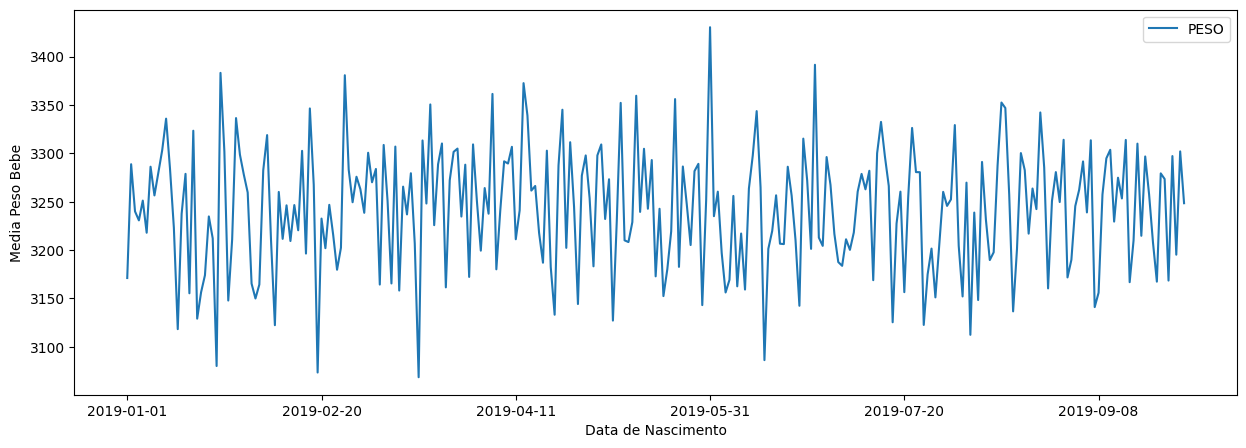

In [43]:
sinasc = pltr('PESO','DTNASC','mean','Media Peso Bebe','Data de Nascimento','default',10)  
